<a href="https://colab.research.google.com/github/kotosham/sleep-stages/blob/main/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('1-csv.csv')
data = data.drop(columns=['Time,s'], axis=1)
df = pd.DataFrame(data)
label_encoder = LabelEncoder()

In [ ]:
df

,1 LDF,1 T,1 A365,1 A460,1 Anadh,2 LDF,2 T,2 A365,2 A460,2 Anadh,Sleep stages
0,18.1,0.00,0.0,0.0,0.000000,21.1,0.0,0.0,0.0,0.0,W
1,18.1,0.00,0.0,0.0,0.000000,21.1,0.0,0.0,0.0,0.0,W
2,18.1,0.00,0.0,0.0,0.000000,21.1,0.0,0.0,0.0,0.0,W
3,18.1,0.00,0.0,0.0,0.000000,21.1,0.0,0.0,0.0,0.0,W
4,19.3,33.72,104.0,65.0,0.625000,20.0,0.0,0.0,0.0,0.0,W
...,...,...,...,...,...,...,...,...,...,...,...
191696,22.0,36.83,128.0,42.0,0.328125,NaN,NaN,NaN,NaN,NaN,N2
191697,21.7,36.83,128.0,42.0,0.328125,NaN,NaN,NaN,NaN,NaN,N2
191698,21.7,36.83,128.0,42.0,0.328125,NaN,NaN,NaN,NaN,NaN,N2
191699,21.7,36.83,128.0,42.0,0.328125,NaN,NaN,NaN,NaN,NaN,N2


In [ ]:
unique_values = df['Sleep stages'].unique()
unique_values

array(['W', nan, 'N3', 'N2', 'R'], dtype=object)

In [ ]:
value_counts = df['Sleep stages'].value_counts()
value_counts

Sleep stages
R     71541
N3    48079
N2    36020
W     12020
Name: count, dtype: int64

In [ ]:
filtered_df = df[df['Sleep stages'] == 'W']
filtered_df

,1 LDF,1 T,1 A365,1 A460,1 Anadh,2 LDF,2 T,2 A365,2 A460,2 Anadh,Sleep stages
0,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
1,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
2,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
3,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
4,19.3,33.72,104.0,65.0,0.625000,20.0,0.00,0.0,0.0,0.000000,W
...,...,...,...,...,...,...,...,...,...,...,...
12015,21.3,35.91,126.0,55.0,0.436508,18.6,36.91,77.0,68.0,0.883117,W
12016,20.3,35.91,126.0,55.0,0.436508,18.6,36.91,77.0,68.0,0.883117,W
12017,20.3,35.91,126.0,55.0,0.436508,17.4,36.91,77.0,68.0,0.883117,W
12018,20.3,35.91,126.0,55.0,0.436508,17.4,36.91,77.0,68.0,0.883117,W


In [ ]:
df_cleaned = df.dropna(how='any')
df_cleaned

,1 LDF,1 T,1 A365,1 A460,1 Anadh,2 LDF,2 T,2 A365,2 A460,2 Anadh,Sleep stages
0,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
1,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
2,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
3,18.1,0.00,0.0,0.0,0.000000,21.1,0.00,0.0,0.0,0.000000,W
4,19.3,33.72,104.0,65.0,0.625000,20.0,0.00,0.0,0.0,0.000000,W
...,...,...,...,...,...,...,...,...,...,...,...
191688,18.7,36.78,128.0,42.0,0.328125,21.9,39.24,84.0,74.0,0.880952,N2
191689,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,N2
191690,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,N2
191691,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,N2


In [ ]:
df_cleaned = df_cleaned[(df_cleaned != 0).all(axis=1)]
df_cleaned

,1 LDF,1 T,1 A365,1 A460,1 Anadh,2 LDF,2 T,2 A365,2 A460,2 Anadh,Sleep stages
20,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
21,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
22,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
23,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
24,18.4,33.79,108.0,64.0,0.592593,26.7,29.93,105.0,106.0,1.009524,W
...,...,...,...,...,...,...,...,...,...,...,...
191688,18.7,36.78,128.0,42.0,0.328125,21.9,39.24,84.0,74.0,0.880952,N2
191689,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,N2
191690,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,N2
191691,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,N2


In [ ]:
filtered_df_cl = df_cleaned[df_cleaned['Sleep stages'] == 'W']
filtered_df_cl

,1 LDF,1 T,1 A365,1 A460,1 Anadh,2 LDF,2 T,2 A365,2 A460,2 Anadh,Sleep stages
20,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
21,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
22,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
23,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,W
24,18.4,33.79,108.0,64.0,0.592593,26.7,29.93,105.0,106.0,1.009524,W
...,...,...,...,...,...,...,...,...,...,...,...
12015,21.3,35.91,126.0,55.0,0.436508,18.6,36.91,77.0,68.0,0.883117,W
12016,20.3,35.91,126.0,55.0,0.436508,18.6,36.91,77.0,68.0,0.883117,W
12017,20.3,35.91,126.0,55.0,0.436508,17.4,36.91,77.0,68.0,0.883117,W
12018,20.3,35.91,126.0,55.0,0.436508,17.4,36.91,77.0,68.0,0.883117,W


In [ ]:
df_cleaned['Sleep stages'] = label_encoder.fit_transform(df_cleaned['Sleep stages'])
df_cleaned

C:\Users\user\AppData\Local\Temp\ipykernel_8444\3399840036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sleep stages'] = label_encoder.fit_transform(df_cleaned['Sleep stages'])


,1 LDF,1 T,1 A365,1 A460,1 Anadh,2 LDF,2 T,2 A365,2 A460,2 Anadh,Sleep stages
20,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,3
21,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,3
22,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,3
23,19.6,33.72,104.0,65.0,0.625000,27.8,29.93,105.0,106.0,1.009524,3
24,18.4,33.79,108.0,64.0,0.592593,26.7,29.93,105.0,106.0,1.009524,3
...,...,...,...,...,...,...,...,...,...,...,...
191688,18.7,36.78,128.0,42.0,0.328125,21.9,39.24,84.0,74.0,0.880952,0
191689,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,0
191690,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,0
191691,19.9,36.83,128.0,42.0,0.328125,26.6,39.24,84.0,74.0,0.880952,0


<Axes: >

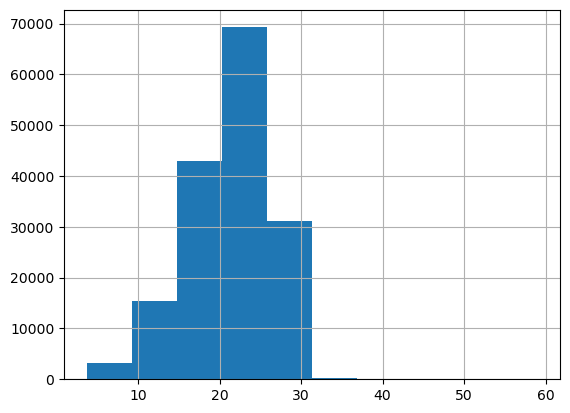

In [ ]:
df_cleaned['1 LDF'].hist()

<Axes: >

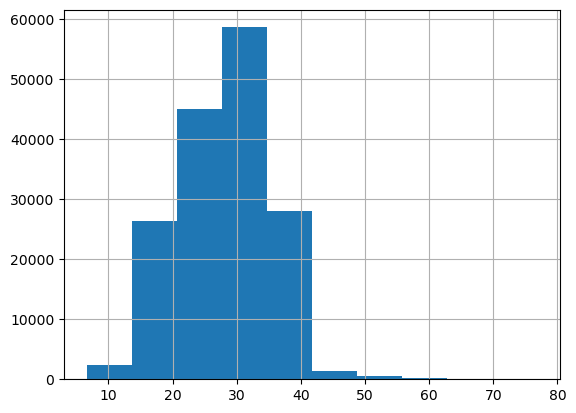

In [ ]:
df_cleaned['2 LDF'].hist()

<Axes: >

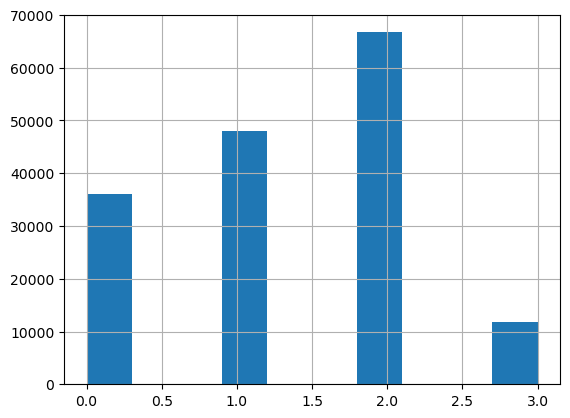

In [ ]:
df_cleaned['Sleep stages'].hist()

<Axes: >

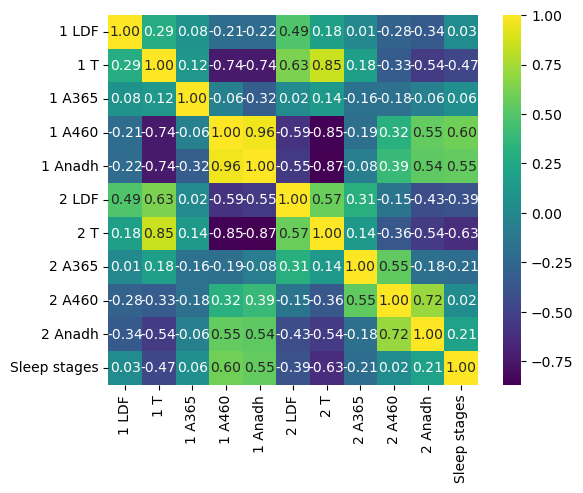

In [ ]:
sns.heatmap(df_cleaned.corr(), cmap="viridis", annot=True, square=True, fmt='.2f')

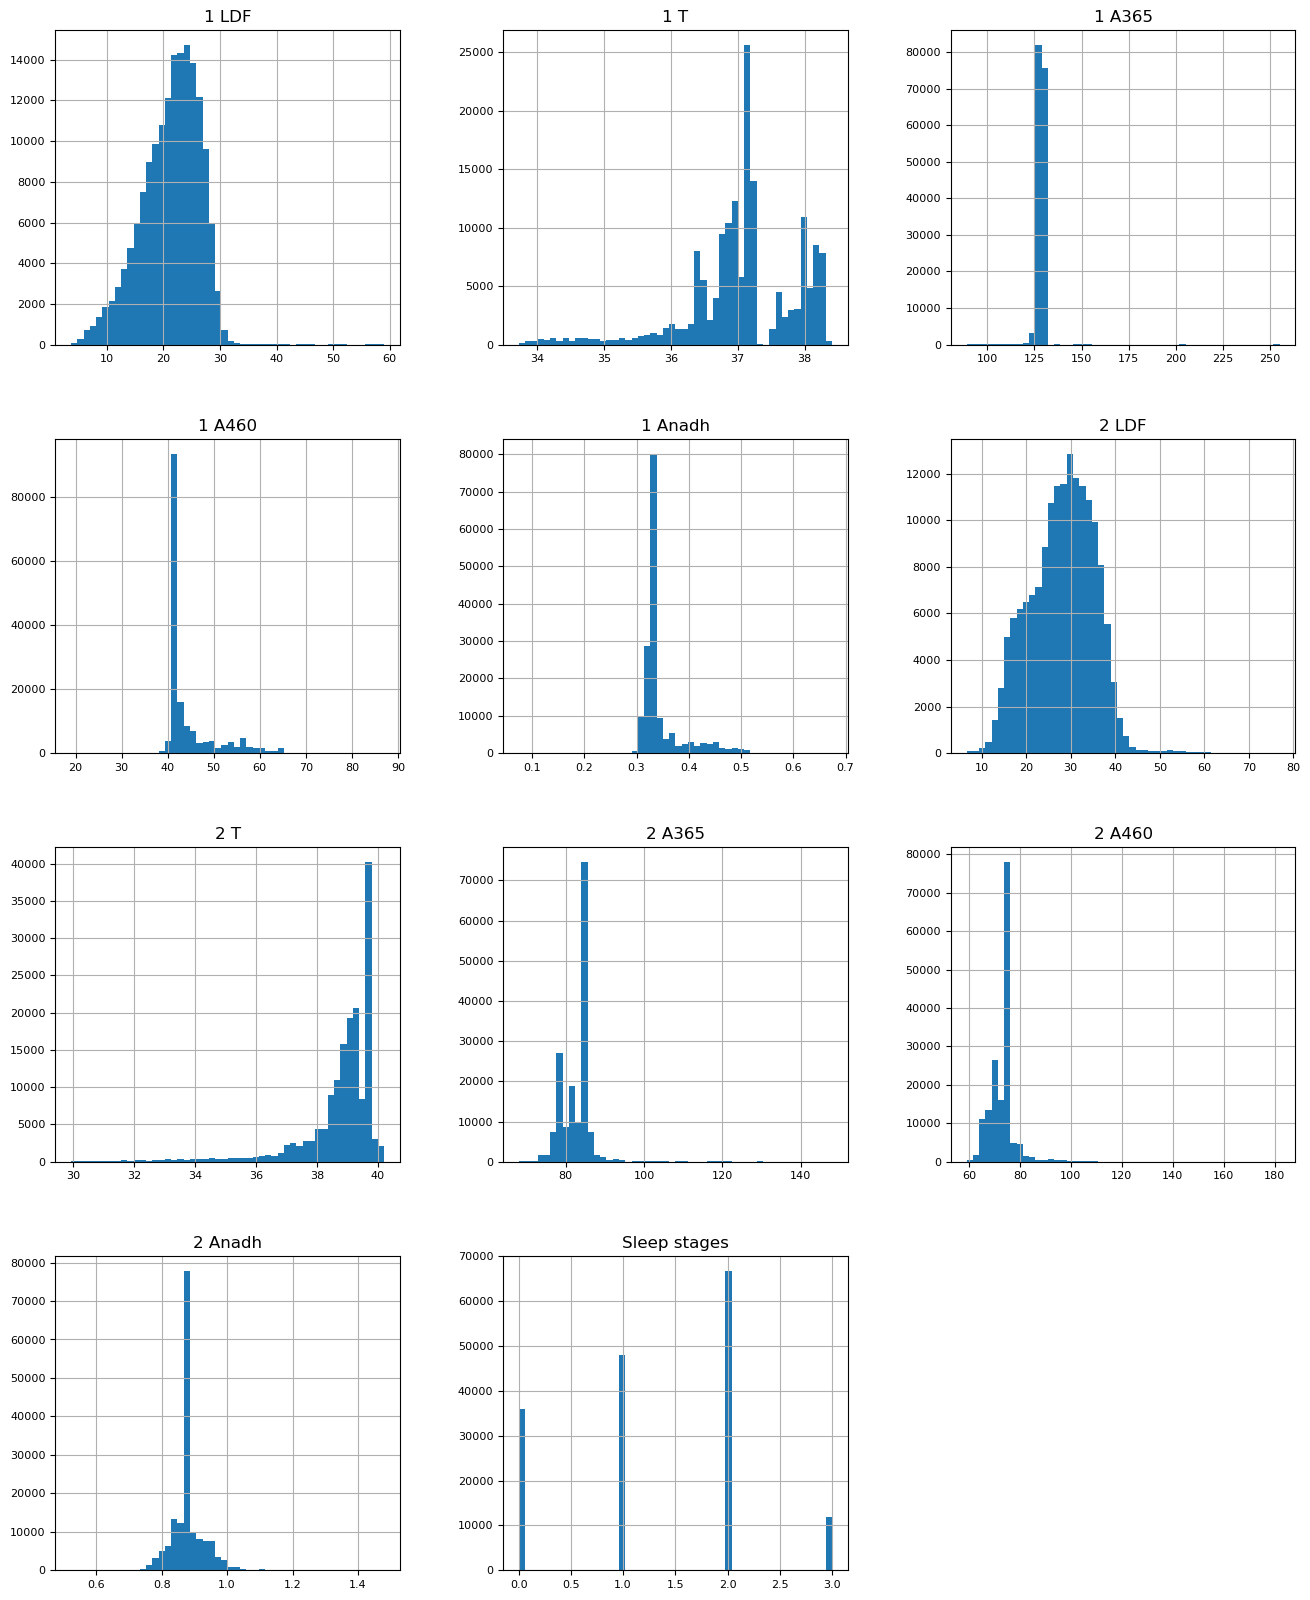

In [ ]:
df_cleaned.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
df_cleaned = df_cleaned.drop(df.columns[[7,8,9]], axis=1)
df_cleaned

,1 LDF,1 T,1 A365,1 A460,1 Anadh,Sleep stages
20,19.6,33.72,104.0,65.0,0.625000,3
21,19.6,33.72,104.0,65.0,0.625000,3
22,19.6,33.72,104.0,65.0,0.625000,3
23,19.6,33.72,104.0,65.0,0.625000,3
24,18.4,33.79,108.0,64.0,0.592593,3
...,...,...,...,...,...,...
191688,18.7,36.78,128.0,42.0,0.328125,0
191689,19.9,36.83,128.0,42.0,0.328125,0
191690,19.9,36.83,128.0,42.0,0.328125,0
191691,19.9,36.83,128.0,42.0,0.328125,0


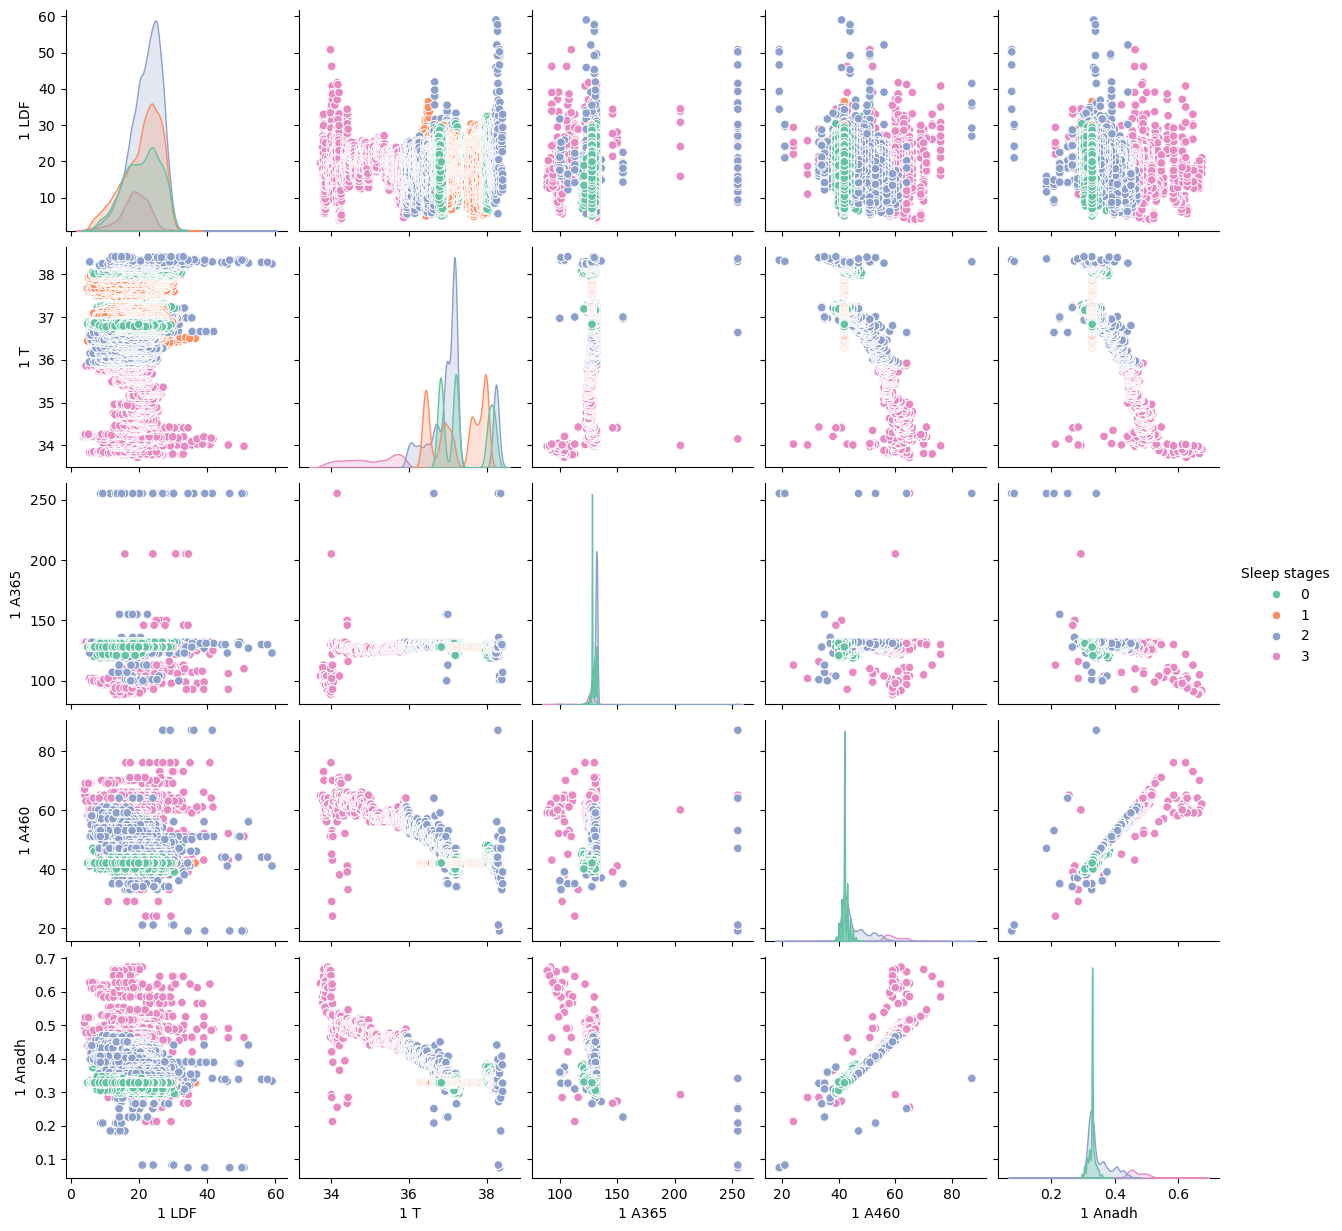

In [ ]:
sns.pairplot(df_cleaned, hue = 'Sleep stages', palette='Set2')
plt.savefig('pairplot_sleep_stages.png', dpi=300, bbox_inches='tight')

In [ ]:
df_cleaned.to_csv('1-update.csv', index=False)